In [4]:
#Setup the google drive
import os
#from google.colab import drive
#drive.mount('/content/gdrive')
#os.listdir('/content/gdrive/MyDrive')
#Basic packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(1)
import tensorflow as tf
tf.random.set_seed(2)
#Keras/TensorFlow
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Conv2DTranspose, Input, Concatenate, Dense, Add
from tensorflow.keras.models import load_model, Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
#Keras image processing
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
#Seaborn
import seaborn as sns #

In [11]:
# can replace wit full trainPath and TestPath
curPath = os.getcwd()
trainPath = curPath + '/TRAIN'
testPath = curPath + '/TEST'


trainIDs = next(os.walk(trainPath))[1]  # IDs, refers to 6-digit identifier (ie 000000)
train_x = []
train_y = []

for id in trainIDs:
    imPath = trainPath + '/' + id
    imNames = next(os.walk(imPath))[2]  # this will break if there are not at least 3 images in each subdir
    train_x.append([tf.keras.utils.load_img(imPath + '/' + imNames[0], target_size=(256,256)), \
                    tf.keras.utils.load_img(imPath + '/' + imNames[1], target_size=(256,256))])
    train_y.append(tf.keras.utils.load_img(imPath + '/' + imNames[2], target_size=(256,256)))

train_x = np.array(train_x)
train_y = np.array(train_y)

testIDs = next(os.walk(testPath))[1]  # IDs, refers to 6-digit identifier (ie 000000)
test_x = []
test_y = []

for id in testIDs:
    imPath = testPath + '/' + id
    imNames = next(os.walk(imPath))[2]  # this will break if there are not at least 3 images in each subdir
    test_x.append([tf.keras.utils.load_img(imPath + '/' + imNames[0], target_size=(256,256)), \
                    tf.keras.utils.load_img(imPath + '/' + imNames[1], target_size=(256,256))])
    test_y.append(tf.keras.utils.load_img(imPath + '/' + imNames[2], target_size=(256,256)))

test_x = np.array(test_x)
test_y = np.array(test_y)

(514, 256, 256)


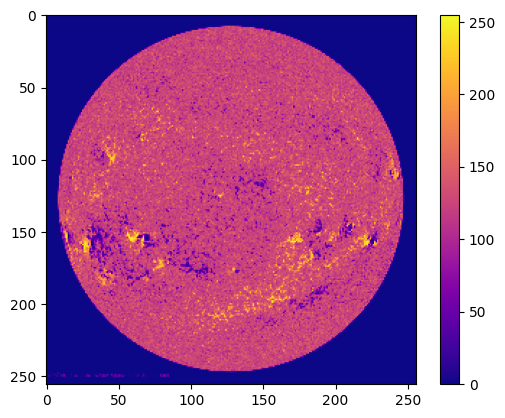

In [14]:
# x shape (bs, 2)
# y shape (bs)
# images are three channels, but only one is needed since grayscale
fig, ax = plt.subplots(1)

pos = ax.imshow(train_y[0][:,:,0], cmap='plasma')
fig.colorbar(pos, ax=ax)
print(train_y[:,:,:,0].shape)

In [ ]:
# kernel = (4,4)
# pool_size = (2,2)
# filters = 32
# loss_rate = 1e-4
# epochs = 2
# batch_size = 128
# val_split = 0.15
# hyperparameters = [kernel,pool_size]

# class customModel(tf.keras.Model):
#     def __init__(self, hyperparameters):
#         super().__init__()
#         self.inp1 = Input(shape=(1024,1024,1))
#         self.inp2 = Input(shape=(1024,1024,1))
#         self.cat = Concatenate(axis=1)
#         self.conv1 = Conv2D(filters, kernel, padding = 'same', activation='relu')
#         self.pool1 = MaxPooling2D(pool_size=pool_size)
#         self.conv2 = Conv2D(filters,kernel, padding = 'same',activation='relu')
#         self.pool2 = MaxPooling2D(pool_size=pool_size)
#         self.tconv1 = Conv2DTranspose(filters, kernel, strides=pool_size, padding = 'same') #Upsampling to get back to 1024x1024
#         self.tconv2 = Conv2DTranspose(1, kernel, strides=pool_size, padding = 'same')
#     def call(self, inputs):
#         x1 = inputs[0]
#         x2 = inputs[1]
#         x = self.cat([x1,x2])
#         x = self.conv1(x)
#         x = self.pool1(x)
#         x = self.conv2(x)
#         x = self.pool2(x)
#         x = self.tconv1(x)
#         return self.tconv2(x)


# model = customModel('dum')
# model.compile(optimizer=Adam(loss_rate),loss='mean_squared_error',metrics=['accuracy'])
# checkpoint = ModelCheckpoint('best_model.keras', monitor='val_accuracy', save_best_only=True, mode='min')
# history=model.fit([train_x[:,0], train_x[:,1]], train_y, epochs=epochs, batch_size=batch_size, callbacks=checkpoint)

Epoch 1/2


/home/abedel/miniconda3/envs/ners590/lib/python3.12/site-packages/keras/src/layers/layer.py:1383: UserWarning: Layer 'custom_model_8' looks like it has unbuilt state, but Keras is not able to trace the layer `call()` in order to build it automatically. Possible causes:
1. The `call()` method of your layer may be crashing. Try to `__call__()` the layer eagerly on some test input first to see if it works. E.g. `x = np.random.random((3, 4)); y = layer(x)`
2. If the `call()` method is correct, then you may need to implement the `def build(self, input_shape)` method on your layer. It should create all variables used by the layer (e.g. by calling `layer.build()` on all its children layers).
Exception encountered: ''got an unexpected keyword argument 'dtype'''
  warnings.warn(
/home/abedel/miniconda3/envs/ners590/lib/python3.12/site-packages/keras/src/layers/layer.py:391: UserWarning: `build()` was called on layer 'custom_model_8', however the layer does not have a `build()` method implemente

TypeError: Exception encountered when calling customModel.call().

[1mgot an unexpected keyword argument 'dtype'[0m

Arguments received by customModel.call():
  • inputs=('tf.Tensor(shape=(None, 1024, 1024, 3), dtype=uint8)', 'tf.Tensor(shape=(None, 1024, 1024, 3), dtype=uint8)')

In [17]:
kernel = (4,4)
pool_size = (2,2)
filters = [4, 8]
loss_rate = 1e-4
epochs = 10
batch_size = 128
val_split = 0.15

x1 = Input(shape=(256,256,1))
x2 = Input(shape=(256,256,1))
x = Add()([x1,x2])
x = Conv2D(filters[0], kernel, padding = 'same', activation='relu')(x)
x = MaxPooling2D(pool_size=pool_size)(x)
x = Conv2D(filters[0],kernel, padding = 'same',activation='relu')(x)
x = Dense(1, activation='relu')(x)
x = MaxPooling2D(pool_size=(2,2))(x)    # editted this line to change dimension sizes
x = Conv2DTranspose(filters[0], kernel, strides=pool_size, padding = 'same')(x) #Upsampling to get back to 1024x1024
x = Conv2DTranspose(1, kernel, strides=pool_size, padding = 'same')(x)

# # Alternative to MSE loss
# def SSIMLoss(y_true, y_pred):
#   return 1 - tf.reduce_mean(tf.image.ssim(y_true, y_pred, 1.0))


model = Model(inputs=[x1,x2], outputs=x)
model.compile(optimizer=Adam(loss_rate),loss='MAE')
model.summary()
checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True, mode='min')
history=model.fit([train_x[:,0,:,:,0], train_x[:,1,:,:,0]], train_y[:,:,:,0], epochs=epochs, verbose=True, batch_size=batch_size, validation_split = val_split, callbacks=checkpoint)

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_16      │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_17      │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_8 (Add)         │ (None, 256, 256,  │          0 │ input_layer_16[0… │
│                     │ 1)                │            │ input_layer_17[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_13 (Conv2D)  │ (None, 256, 256,  │         68 │ add_8[0][0]       │
│                     │ 4)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_12    │ (None, 128, 128,  │          0 │ conv2d_13[0][0]   │
│ (MaxPooling2D)      │ 4)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_14 (Conv2D)  │ (None, 128, 128,  │        260 │ max_pooling2d_12… │
│                     │ 4)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_6 (Dense)     │ (None, 128, 128,  │          5 │ conv2d_14[0][0]   │
│                     │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_13    │ (None, 64, 64, 1) │          0 │ dense_6[0][0]     │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_transpose_12 │ (None, 128, 128,  │         68 │ max_pooling2d_13… │
│ (Conv2DTranspose)   │ 4)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_transpose_13 │ (None, 256, 256,  │         65 │ conv2d_transpose… │
│ (Conv2DTranspose)   │ 1)                │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 466 (1.82 KB)

 Trainable params: 466 (1.82 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - loss: 86.5405 - val_loss: 86.4124
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - loss: 86.5376 - val_loss: 86.4095
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - loss: 86.5347 - val_loss: 86.4066
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - loss: 86.5319 - val_loss: 86.4039
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - loss: 86.5291 - val_loss: 86.4012
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - loss: 86.5265 - val_loss: 86.3987
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - loss: 86.5240 - val_loss: 86.3963
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - loss: 86.5216 - val_loss: 86.3940
Epoch 9/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - loss: 86.5193 - val_loss: 86.3917
Epoch 10/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - loss: 86.5171 - val_loss: 86.3894


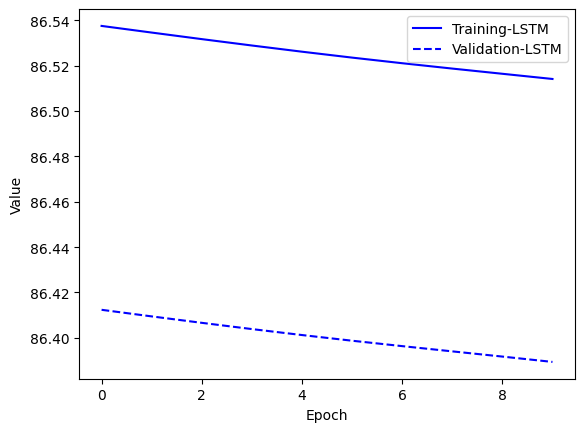

In [18]:
mae = history.history['loss']
vmae = history.history['val_loss']
plt.figure()
plt.plot(mae, label='Training-LSTM',color='blue',linestyle='-')
plt.plot(vmae, label='Validation-LSTM',color='blue',linestyle='--')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.legend()

In [22]:
model_best = load_model('best_model.keras')
best_eval = model_best.evaluate([test_x[:,0,:,:,0], test_x[:,1,:,:,0]], test_y,verbose=2)
new_images = model_best.predict([test_x[:,0,:,:,0], test_x[:,1,:,:,0]])

5/5 - 0s - 93ms/step - loss: 86.4674
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 149ms/step


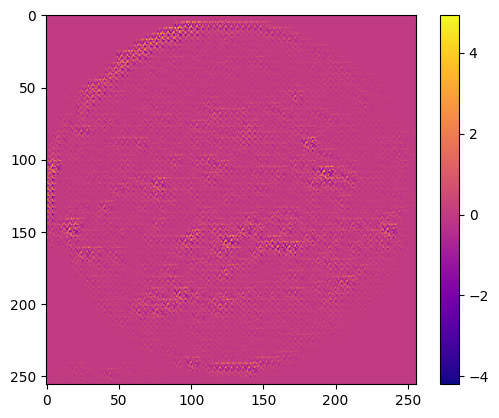

In [23]:
plt.imshow(new_images[0], cmap='plasma')
plt.colorbar()

In [25]:
diff = []
image_mean = []
image_std = []

for i in new_images:
  diff.append(np.array(new_images[i]) - np.array(test_y[i]))
  image_mean.append(np.mean(diff[i]))
  image_std.append(np.std(diff[i]))

total_mean = np.mean(image_mean)
total_std = np.std(image_std)
print("The mean of the pixel differences is ", total_mean, " +/- ", total_std)

IndexError: arrays used as indices must be of integer (or boolean) type

In [26]:
n = 10
for i in range(n):
        i = np.random.randint(0,diff.shape[0]) # choose a random number between 0 and len(X_te)
        plt.figure()
        plt.imshow(diff[i], cmap='gray')
        plt.title('Difference between true image and predicted image for the ' + str(i) + 'th image')
        plt.colorbar()

        plt.show()

AttributeError: 'list' object has no attribute 'shape'